# Downloading data from Sentinel-hub

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import pprint
import math

from sentinelhub import AwsTile
from sentinelhub import AwsTileRequest

from sentinelhub import WebFeatureService, BBox, CRS, DataCollection, SHConfig

from shapely.geometry import shape, Polygon, MultiPolygon, MultiLineString

# Configuring Credentials

In [3]:
config = SHConfig()

# Set your own ids and secrets
# https://sentinelhub-py.readthedocs.io/en/latest/configure.html#


config.instance_id = ""
config.sh_client_id = ""
config.sh_client_secret = ""
config.aws_access_key_id = ""
config.aws_secret_access_key = ""
config.save()

if config.instance_id == '':
    print("Warning! To use WFS functionality, please configure the `instance_id`.")

In [24]:
sokoto_bbox = [(4.364, 12.319), (6.125, 13.798)]

search_bbox = BBox(bbox=sokoto_bbox, crs=CRS.WGS84)
search_time_interval = (
    '2021-06-14',
    '2021-06-14'
)

wfs_iterator = WebFeatureService(
    search_bbox,
    search_time_interval,
    data_collection=DataCollection.SENTINEL2_L2A,
    maxcc=0.05,
    config=config
)

tiles_details = list(wfs_iterator)

print('Total number of tiles:', len(tiles_details))
print("\nFirst result:")
tiles_details[0]

Total number of tiles: 9

First result:


{'type': 'Feature',
 'geometry': {'type': 'MultiPolygon',
  'crs': {'type': 'name',
   'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'}},
  'coordinates': [[[[3.9209035558255474, 12.66294734082385],
     [3.9174912101889614, 11.670142208230944],
     [4.9245752036525055, 11.665162144698105],
     [4.93172892646793, 12.657530581606334],
     [3.9209035558255474, 12.66294734082385]]]]},
 'properties': {'id': 'S2B_OPER_MSI_L2A_TL_VGS2_20210614T143434_A022313_T31PFP_N03.00',
  'date': '2021-06-14',
  'time': '10:17:36',
  'path': 's3://sentinel-s2-l2a/tiles/31/P/FP/2021/6/14/0',
  'crs': 'EPSG:32631',
  'mbr': '600000,1290240 709800,1400040',
  'cloudCoverPercentage': 0}}

In [25]:
def show_polygon(polygon):
    plt.plot(*polygon.exterior.xy)
    plt.grid()
    
def plot_tiles(tiles, bbox):
    cols = 5
    rows = math.ceil(len(tiles)/cols)

    fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 15), sharex=True, sharey=True)

    for i, (ax, tile) in enumerate(zip(axs.flat, tiles)):
        coords = tile["geometry"]["coordinates"][0][0]
        polygon = Polygon(coords)
        
        ax.plot(*bbox.geometry.exterior.xy)
        ax.plot(*polygon.exterior.xy)
        ax.set(aspect='equal')
        ax.set_title(f'Tile {i}')
        ax.grid()

    fig.tight_layout()
    fig.show()

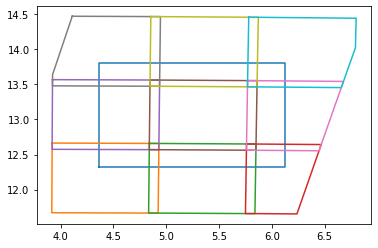

In [26]:
show_polygon(search_bbox.geometry)
    
for data in tiles_details:
    coords = data["geometry"]["coordinates"][0][0]
    show_polygon(Polygon(coords))

<ipython-input-25-f3657f07d377>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


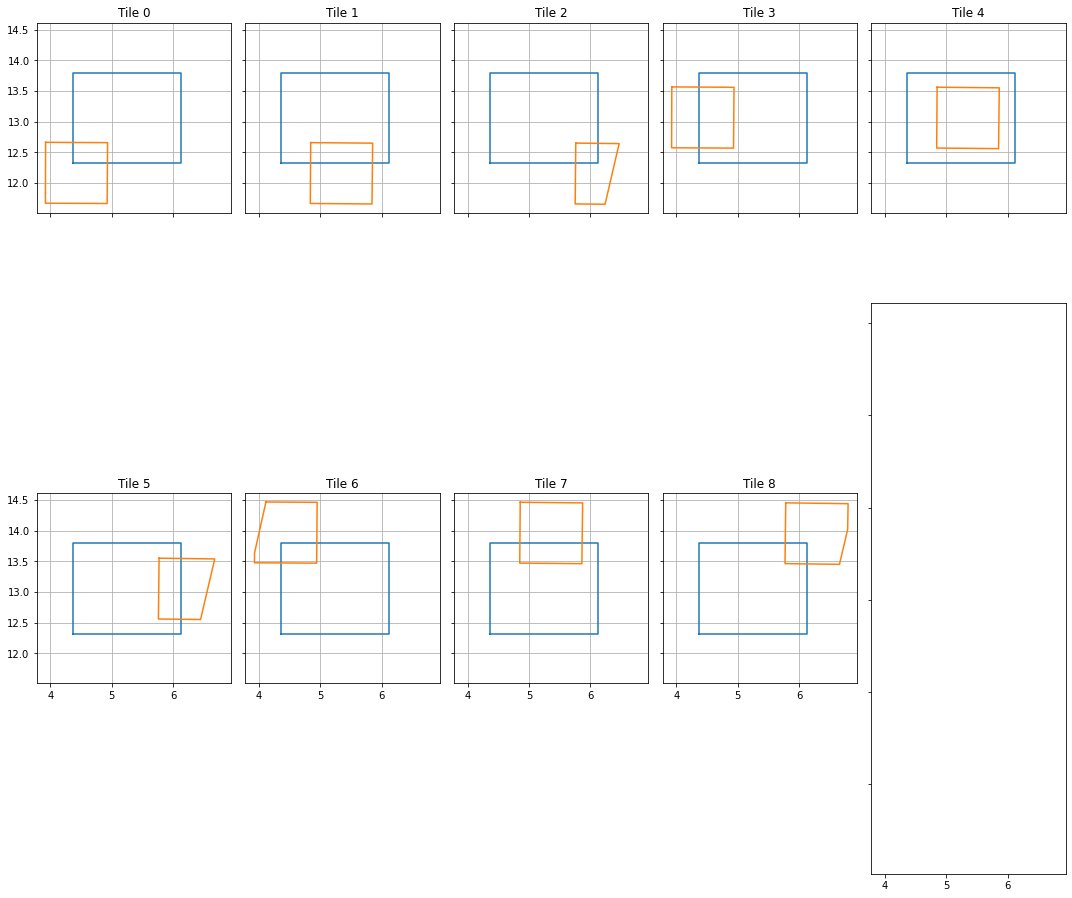

In [30]:
plot_tiles(tiles_details, search_bbox)

In [28]:
bands = ['R10m/TCI'] # True Color Index
metafiles = ['tileInfo']
data_folder = './data/sentinel2'

In [31]:
selected_tiles_number = [0, 1, 2, 3, 4, 5, 6, 7, 8]
selected_tiles = []
tiles_id = wfs_iterator.get_tiles()

for tile_number in selected_tiles_number:
    selected_tiles.append(tiles_id[tile_number])
    
print(f'# selected tiles: {len(selected_tiles)}')

# selected tiles: 9


In [32]:
for tile in selected_tiles:
    print(tile)
    tile_name, time, aws_index = tile

    request = AwsTileRequest(
        tile=tile_name,
        time=time,
        aws_index=aws_index,
        bands=bands,
        metafiles=metafiles,
        data_folder=data_folder,
        data_collection=DataCollection.SENTINEL2_L2A
    )

    request.save_data()  # This is where the download is triggered

('31PFP', '2021-6-14', 0)


c:\users\matt989253\miniconda3\envs\tb\lib\site-packages\sentinelhub\aws.py:166: SHUserWarning: Products with baseline 03.00 are not officially supported in sentinelhub-py. If you notice any errors in naming structure of downloaded data please report an issue at https://github.com/sentinel-hub/sentinelhub-py/issues. Pull requests are also very appreciated
  warnings.warn(message, category=SHUserWarning)


('31PGP', '2021-6-14', 0)


c:\users\matt989253\miniconda3\envs\tb\lib\site-packages\sentinelhub\aws.py:166: SHUserWarning: Products with baseline 03.00 are not officially supported in sentinelhub-py. If you notice any errors in naming structure of downloaded data please report an issue at https://github.com/sentinel-hub/sentinelhub-py/issues. Pull requests are also very appreciated
  warnings.warn(message, category=SHUserWarning)


('31PHP', '2021-6-14', 0)


c:\users\matt989253\miniconda3\envs\tb\lib\site-packages\sentinelhub\aws.py:166: SHUserWarning: Products with baseline 03.00 are not officially supported in sentinelhub-py. If you notice any errors in naming structure of downloaded data please report an issue at https://github.com/sentinel-hub/sentinelhub-py/issues. Pull requests are also very appreciated
  warnings.warn(message, category=SHUserWarning)


('31PFQ', '2021-6-14', 0)


c:\users\matt989253\miniconda3\envs\tb\lib\site-packages\sentinelhub\aws.py:166: SHUserWarning: Products with baseline 03.00 are not officially supported in sentinelhub-py. If you notice any errors in naming structure of downloaded data please report an issue at https://github.com/sentinel-hub/sentinelhub-py/issues. Pull requests are also very appreciated
  warnings.warn(message, category=SHUserWarning)


('31PGQ', '2021-6-14', 0)
('31PHQ', '2021-6-14', 0)


c:\users\matt989253\miniconda3\envs\tb\lib\site-packages\sentinelhub\aws.py:166: SHUserWarning: Products with baseline 03.00 are not officially supported in sentinelhub-py. If you notice any errors in naming structure of downloaded data please report an issue at https://github.com/sentinel-hub/sentinelhub-py/issues. Pull requests are also very appreciated
  warnings.warn(message, category=SHUserWarning)


('31PFR', '2021-6-14', 0)


c:\users\matt989253\miniconda3\envs\tb\lib\site-packages\sentinelhub\aws.py:166: SHUserWarning: Products with baseline 03.00 are not officially supported in sentinelhub-py. If you notice any errors in naming structure of downloaded data please report an issue at https://github.com/sentinel-hub/sentinelhub-py/issues. Pull requests are also very appreciated
  warnings.warn(message, category=SHUserWarning)


('31PGR', '2021-6-14', 0)


c:\users\matt989253\miniconda3\envs\tb\lib\site-packages\sentinelhub\aws.py:166: SHUserWarning: Products with baseline 03.00 are not officially supported in sentinelhub-py. If you notice any errors in naming structure of downloaded data please report an issue at https://github.com/sentinel-hub/sentinelhub-py/issues. Pull requests are also very appreciated
  warnings.warn(message, category=SHUserWarning)


('31PHR', '2021-6-14', 0)


c:\users\matt989253\miniconda3\envs\tb\lib\site-packages\sentinelhub\aws.py:166: SHUserWarning: Products with baseline 03.00 are not officially supported in sentinelhub-py. If you notice any errors in naming structure of downloaded data please report an issue at https://github.com/sentinel-hub/sentinelhub-py/issues. Pull requests are also very appreciated
  warnings.warn(message, category=SHUserWarning)
